# Modelos de conexão de multi agentes - multi agentes / Multi-agent connection models - multi-agents
Esse estudo almeja uma melhor visualização dos diferentes tipos de conexão e comunicação entre os multi agentes através de exemplos simplificados.

This study aims to provide a better visualization of the different types of connection and communication among multi-agents through simplified examples.
## Esse notebook visa a criação dos exemplos de multi agentes / This notebook aims at creating examples of multi-agent systems.

##Imports

In [28]:
import pickle
import pandas                               as pd
import numpy                                as np
from matplotlib               import pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble         import RandomForestRegressor
from sklearn.metrics          import mean_squared_error

# Agente previsão: padrão y = x^2 + 1 + z / Prediction agent: pattern y = x^2 + 1 + z

Criação de um banco de dados que siga o padrão indicado
--
Creation of a database following the indicated pattern

In [2]:
data = [[1, 0, 0], [3, 1, 1], [7, 2, 2], [13, 3, 3], [21, 4, 4], [31, 5, 5], [575, 23, 45], [281, 16, 24], [109, 9, 27], [431, 20, 30]]
df = pd.DataFrame(data, columns=['Y', 'X', 'Z'])
df.head()

,Y,X,Z
0,1,0,0
1,3,1,1
2,7,2,2
3,13,3,3
4,21,4,4


Visualizaão do gráfico da função
--
Visualization of the function graph

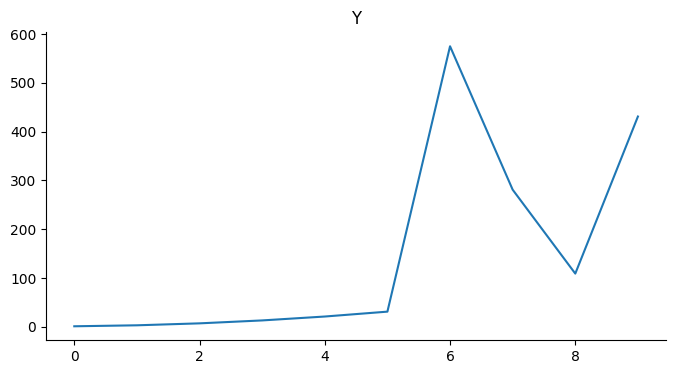

In [6]:
df['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

Separação do dataframe
--
DataFrame separation

In [7]:
X = df[['X', 'Z']]
y = df['Y']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [11]:
X_train_numpy = X_train.to_numpy()
X_test_numpy = X_test.to_numpy()
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

Algoritmo: random forest
--
Algorithm: Random Forest

In [14]:
X_numpy = np.concatenate((X_train_numpy, X_test_numpy), axis = 0)

In [15]:
y_numpy = np.concatenate((y_train_numpy, y_test_numpy), axis = 0)

In [16]:
params = {'n_estimators':[10, 50, 100],
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [19]:
grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = params)
grid_search.fit(X_numpy, y_numpy)
best_params = grid_search.best_params_
best_results = grid_search.best_score_
print(best_params)
print(best_results)

{'criterion': 'friedman_mse', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
-10.944444421260727


Criação do modelo de previsão com os melhores parâmetros
--
Creation of the prediction model with the best parameters.

In [20]:
RF = RandomForestRegressor(**best_params)

In [21]:
RF.fit(X_numpy, y_numpy)

RandomForestRegressor(criterion='friedman_mse', n_estimators=10)

In [22]:
prediction = RF.predict(X_test_numpy)
prediction

array([445.4,  28.2,   8. ])

In [23]:
y_test_numpy

array([431,  31,   7])

Acurácia
--
Accuracy

In [26]:
mean_squared_error(y_test_numpy, prediction)

72.06666666666645

Previsão pontual
--
Point prediction

In [27]:
input = [[100, 200]]
RF.predict(input)[0]

503.0

Salvando o modelo com pickle
--
Saving the model with pickle.

In [29]:
file = open('RF.pkl', 'wb')
pickle.dump(RF, file)
file.close()

Testando o modelo salvo
--
Testing the saved model.

In [30]:
RF = pickle.load(open('/content/RF.pkl', 'rb'))
RF.predict(input)[0]

503.0

# Agente previsão: padrão y = x*5 - 2 + z

# Agente previsão: padrão y = xz + 7